<a href="https://colab.research.google.com/github/OMONa-E/Cirrhosis-Status-Prediction/blob/main/Cirrhosis_Prediction_NueralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Omona Emmanuel

**Context**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

**Attribute Information**

1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

**Acknowledgements**

The dataset can be found in appendix D of:

Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.

fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
# set display to 100 maximum columns
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.metrics import silhouette_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio
from sklearn.feature_selection import f_classif, f_regression, VarianceThreshold, SelectFromModel, SequentialFeatureSelector
from sklearn.cluster import KMeans

In [ ]:
# define file path of our dataset
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/cirrhosis.csv'
# read and load dataset with pandas
cir_df = pd.read_csv(fpath)

###### Explore/Clean data

In [ ]:
# obtain the .info and head of the dataframe
display(cir_df.info(),cir_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

None

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [ ]:
# set ID to index of the dataframe
cir_df.set_index('ID', inplace=True)

# for the 7 object type features we check for consistancy
for item in cir_df.select_dtypes('object').columns:
  print(f'{cir_df[item].value_counts(dropna=False)}')
  print('\n')

Status
C     232
D     161
CL     25
Name: count, dtype: int64


Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: count, dtype: int64


Sex
F    374
M     44
Name: count, dtype: int64


Ascites
N      288
NaN    106
Y       24
Name: count, dtype: int64


Hepatomegaly
Y      160
N      152
NaN    106
Name: count, dtype: int64


Spiders
N      222
NaN    106
Y       90
Name: count, dtype: int64


Edema
N    354
S     44
Y     20
Name: count, dtype: int64




In [ ]:
# check for duplicates
cir_df.duplicated().sum()

0

#### MODEL - PCA and CLUSTERING

In [ ]:
# @title Evaluate FUNC
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [ ]:
# @title train test split
### possible targets [Stage - numeric, Drug - categorical, Status - categorical]
"""We choose Status"""
target = 'Status'
## feature matrice, X and target vector, y
y = cir_df[target]
X = cir_df.drop(columns=[target])
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# @title Imbalance check
y_train.value_counts(normalize=True)

Status
C     0.552716
D     0.389776
CL    0.057508
Name: proportion, dtype: float64

In [ ]:
# @title Preprocessing
### None of feature is Ordinal, all features are categorical
"""Therefore we have only Categorical and Numeric Features"""
## categorical feature
cat_cols = X_train.select_dtypes('object').columns
## numeric features
num_cols = X_train.select_dtypes('number').columns

## Feature transformation
# categorical
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
# numeric
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# columns transfomer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', num_trans, num_cols),
    ('categorical', cat_trans, cat_cols)
])

## applying preprocessing
# fit_transform train data
X_train_tf = preprocessor.fit_transform(X_train)
# transform test data
X_test_tf = preprocessor.transform(X_test)

In [ ]:
# @title Balance Data with SMOTE
## instantiate SMOTE
sm = SMOTE(random_state=0)
## fit
X_train_tf_sm, y_train_tf_sm = sm.fit_resample(X_train_tf, y_train)

y_train_tf_sm.value_counts(normalize=True)

Status
C     0.333333
D     0.333333
CL    0.333333
Name: proportion, dtype: float64

In [ ]:
# @title PCA
## instantiate PCA
pca = PCA(n_components=3, random_state=42)

## fit PCA algo
X_train_pca = pca.fit_transform(X_train_tf_sm)
X_test_pca = pca.transform(X_test_tf)

# display .head()
display(X_train_pca.head(3))

,pca0,pca1,pca2
0,-2.217294,-0.745072,-0.462758
1,0.831560,0.846859,-2.813121
2,-0.420675,0.535660,-0.126164


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.93      0.94      0.93       173
          CL       0.92      0.98      0.95       173
           D       0.99      0.91      0.95       173

    accuracy                           0.94       519
   macro avg       0.94      0.94      0.94       519
weighted avg       0.94      0.94      0.94       519



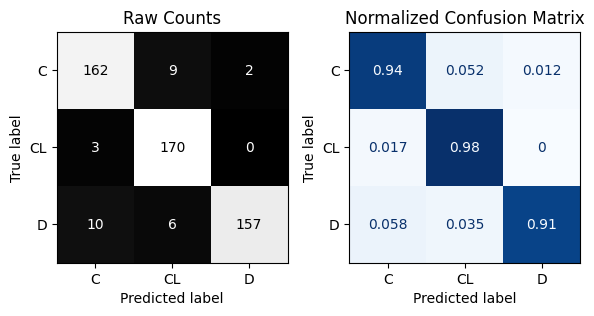


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.73      0.68      0.70        59
          CL       0.12      0.29      0.17         7
           D       0.65      0.56      0.60        39

    accuracy                           0.61       105
   macro avg       0.50      0.51      0.49       105
weighted avg       0.66      0.61      0.63       105



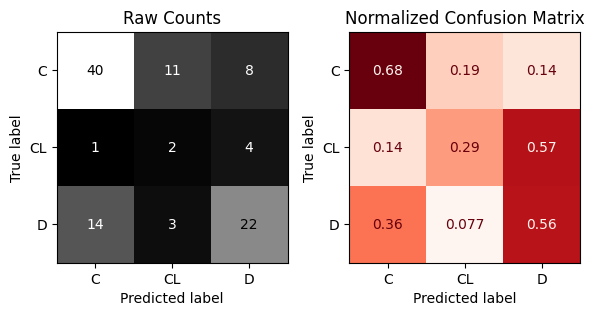

In [ ]:
# @title evaluate our model - PCA
"""In part-1 [https://github.com/OMONa-E/Cirrhosis-Status-Prediction/blob/main/Cirrhosis_Prediction.ipynb]
   We found that GradientBoostingClassifier() emerged the best Algo with
   Best parameters for Gradient Boosting was: {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__n_estimators': 200}"""
## instantiate GradientBoostingClassifier() without its tuned param
gradBoost = GradientBoostingClassifier(random_state=42)

## fit model on PCA train data
gradBoost.fit(X_train_pca, y_train_tf_sm)

## evaluate our model algo
evaluate_classification(gradBoost, X_train_pca, y_train_tf_sm, X_test_pca, y_test)

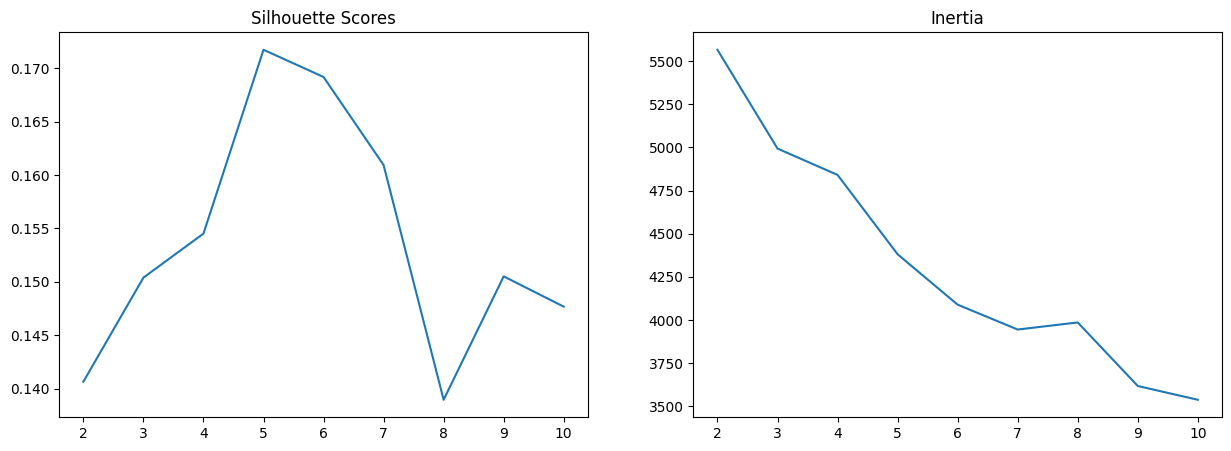

In [ ]:
# @title Clustering Analysis
### define the range of cluster
ks = range(2,11)

### defines list for inertias and silhouette scores
sils = []
inertias = []
## loop thru the range
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_train_tf_sm)
  sils.append(silhouette_score(X_train_tf_sm, kmeans.labels_))
  inertias.append(kmeans.inertia_)

# plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       173
          CL       1.00      1.00      1.00       173
           D       1.00      1.00      1.00       173

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



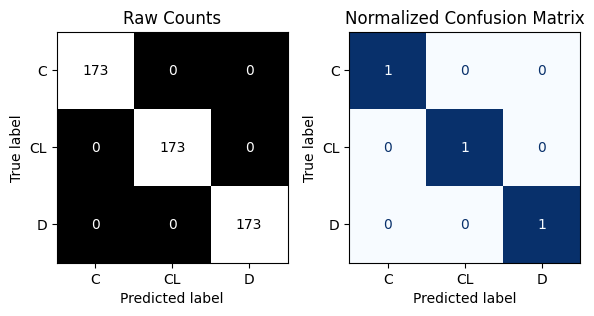


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.77      0.80      0.78        59
          CL       0.00      0.00      0.00         7
           D       0.72      0.74      0.73        39

    accuracy                           0.72       105
   macro avg       0.50      0.51      0.51       105
weighted avg       0.70      0.72      0.71       105



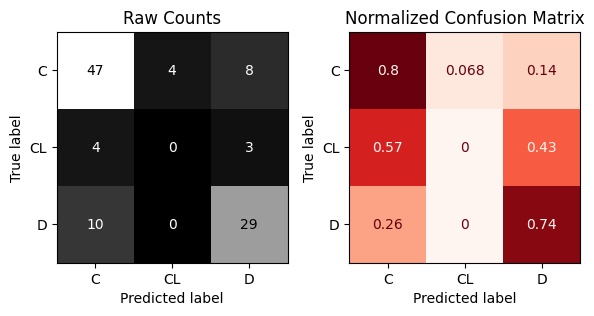

In [ ]:
# @title Clustering - Model
## define number of cluster base on the silhouette = 5 whilst inertia = 3 or 4 or 5 or 7:  lets agreed on 5
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')

## fit - predict
X_train_clusters = kmeans.fit_predict(X_train_tf_sm)
X_test_clusters = kmeans.predict(X_test_tf)

## Combine Clusters with Original Features after balancing
X_train_combined = pd.DataFrame(np.hstack((X_train_tf_sm, X_train_clusters.reshape(-1, 1))))
X_test_combined = pd.DataFrame(np.hstack((X_test_tf, X_test_clusters.reshape(-1, 1))))

## Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_combined, y_train_tf_sm)

## Evaluate Algo
evaluate_classification(gb_classifier, X_train_combined, y_train_tf_sm, X_test_combined, y_test)

Comparing our Model on Engineered dataset (PCA and Clustering) with our orignal dataset [Part 1](https://github.com/OMONa-E/Cirrhosis-Status-Prediction/blob/main/Cirrhosis_Prediction.ipynb):

We see model-PCA performing lowest both on train and test data with accuracy respectively `.94` and `.61`

We see model-CLUSTERING performing the same on both train and test data with accuracy respectively `1.00` and `.70`

And lastly our model-WithoutEngineering performing second with `1.00` and `.70` on train and test data respectively

With this we see though PCA perform worse there are rooms for Tunning and less time computing as well as Clustering still have rooms

#### Feature Selection

In [ ]:
# @title Embedded feature_selection
## instantiate LogisticRegression
logRegress = LogisticRegression()

## instantiate SelectFromModel
selector = SelectFromModel(logRegress)

## fit on engineered data
selector.fit(X_train_combined, y_train_tf_sm)

## define feature to keep
keep_feature = selector.get_support()

## obtain the train test data
X_train_sel = X_test_combined.loc[:, keep_feature]
X_test_sel = X_test_combined.loc[:, keep_feature]

X_train_sel.shape, y_train_tf_sm.shape, X_train_combined.shape

((105, 12), (519,), (519, 30))

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       1.00      1.00      1.00        59
          CL       1.00      1.00      1.00         6
           D       1.00      1.00      1.00        40

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



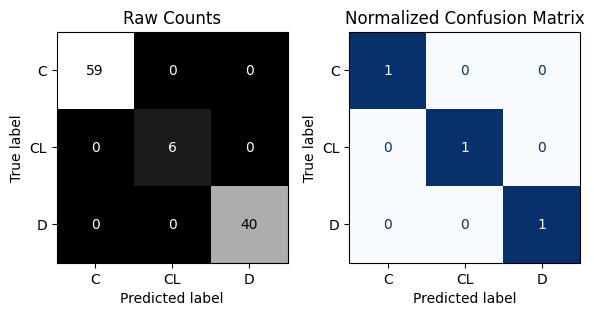


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           C       0.51      0.51      0.51        59
          CL       0.00      0.00      0.00         7
           D       0.30      0.31      0.30        39

    accuracy                           0.40       105
   macro avg       0.27      0.27      0.27       105
weighted avg       0.40      0.40      0.40       105



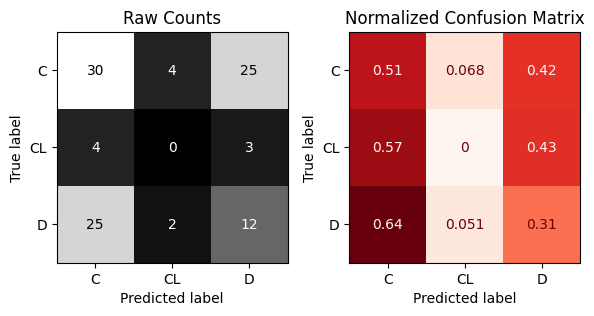

In [ ]:
# @title Evaluate our model
## Train Gradient Boosting Classifier
gb_class = GradientBoostingClassifier()
gb_class.fit(X_train_sel, y_train_tf_sm[0:len(X_train_sel)])

## Evaluate Algo
evaluate_classification(gb_class, X_train_sel, y_train_tf_sm[0:len(X_train_sel)], X_test_sel, y_test)

We see performance on test data reducing to accuracy `.40` without tunning though

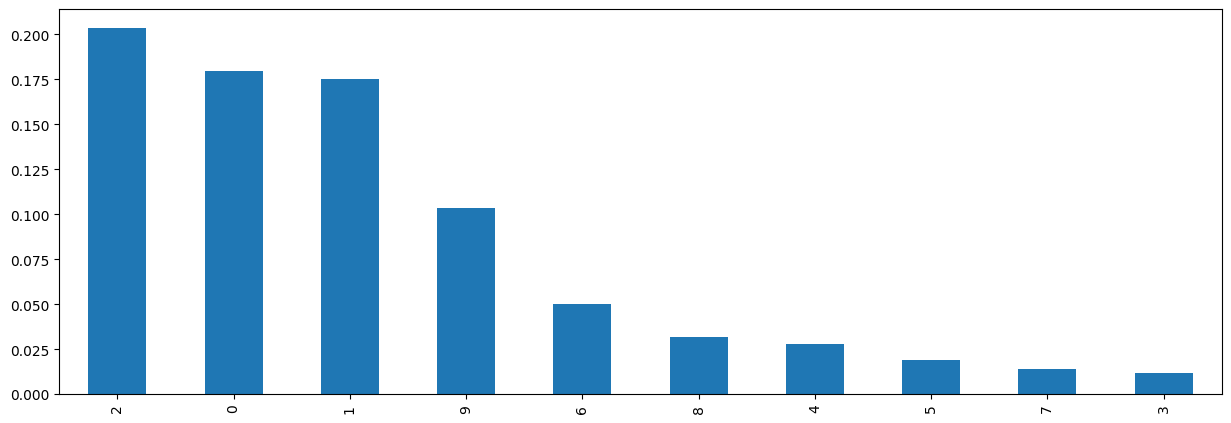

In [ ]:
# @title Top10 Feature Importance Bar chart for Best Model
"""We will perform feature importances extraction on gb_classifier model-CLUSTERING"""
# Access the feature importances of the best estimator
feature_importances = gb_classifier.feature_importances_[:10]

# Create a Pandas Series with feature names and importances
feature_importance_df = pd.Series(feature_importances)

# Sort the DataFrame by importance and plot a bar chart
feature_importance_df.sort_values(ascending=False).plot.bar(figsize=(15, 5));

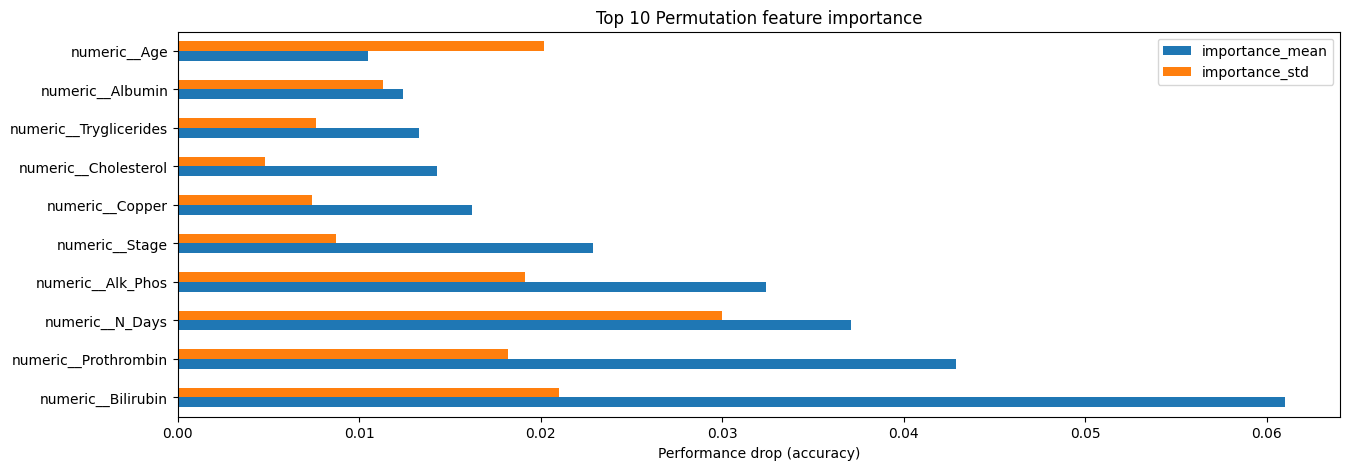

In [ ]:
# @title Top 10 Feature Importance - Permutation
## instantiate GradientBoostingClassifier()
## compute permutation importance
perm_imp = permutation_importance(gb_classifier, X_test_combined, y_test, n_repeats=10, random_state=0, n_jobs=-1, scoring='accuracy')

# Create a dictionary mapping old column names to new column names
column_rename_dict = dict(zip(X_train_combined.columns, X_train_tf_sm.columns))

# Rename columns of X_train_combine using the dictionary
XX = X_train_combined.rename(columns=column_rename_dict)
# rename index 29 to cluster
XX.rename(columns={29: 'Cluster'}, inplace=True)

# get importance
importance = pd.DataFrame(
    {"importance_mean": perm_imp["importances_mean"],
     "importance_std": perm_imp["importances_std"]},
    index=XX.columns)

##### VISUALIZATION
## plot for top 10 absolute features importance
ab_imp = np.absolute(importance)
ab_imp.sort_values(ascending=False, by='importance_mean').round(4)[:10].plot(figsize=(15, 5), kind="barh")
plt.title("Top 10 Permutation feature importance")
plt.xlabel("Performance drop (accuracy)")
plt.show();

We see new features like Cluster amongst others finding its way to the top 10 feature importances compare to [PART 1](https://github.com/OMONa-E/Cirrhosis-Status-Prediction/blob/main/Cirrhosis_Prediction.ipynb)